<a href="https://colab.research.google.com/github/rajnish80130/Real-state-Capstone-Project/blob/main/outliers_treatment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns',None)

In [5]:
df=pd.read_csv('/content/gurgaon_properties_cleaned_v2.csv').drop_duplicates()
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,la vida by tata housing,sector 113,3.00,14285.0,2100.0,Super Built up area 2691(250 sq.m.)Built Up ar...,3,3,3+,3.0,East,Relatively New,2691.0,2460.0,2100.0,0,1,0,0,0,0,167
1,flat,umang monsoon breeze,sector 78,0.88,4746.0,1854.0,Super Built up area 1854(172.24 sq.m.)Built Up...,3,4,3,8.0,North-West,Moderately Old,1854.0,1668.0,1501.0,0,1,0,1,0,0,111
2,flat,ireo the grand arch,sector 58,4.85,16934.0,2864.0,Carpet area: 2864 (266.07 sq.m.),4,5,3,23.0,North-West,Relatively New,NaN,NaN,2864.0,1,1,0,1,1,2,49
3,flat,m3m woodshire,sector 107,1.49,6310.0,2361.0,Super Built up area 2361(219.34 sq.m.),3,4,3+,5.0,East,Relatively New,2361.0,NaN,NaN,0,1,1,0,0,2,174
4,flat,ambience creacions,sector 22,6.16,20533.0,3000.0,Carpet area: 3000 (278.71 sq.m.),4,5,3+,10.0,South-East,New Property,NaN,NaN,3000.0,0,1,0,1,0,2,49


In [6]:
df.shape

(3661, 23)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3661 entries, 0 to 3798
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3661 non-null   object 
 1   society              3660 non-null   object 
 2   sector               3661 non-null   object 
 3   price                3660 non-null   float64
 4   price_per_sqft       3660 non-null   float64
 5   area                 3660 non-null   float64
 6   areaWithType         3661 non-null   object 
 7   bedRoom              3661 non-null   int64  
 8   bathroom             3661 non-null   int64  
 9   balcony              3661 non-null   object 
 10  floorNum             3642 non-null   float64
 11  facing               2622 non-null   object 
 12  agePossession        3661 non-null   object 
 13  super_built_up_area  1875 non-null   float64
 14  built_up_area        1674 non-null   float64
 15  carpet_area          1870 non-null   float6

In [9]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

<ipython-input-16-5ed08d894de5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

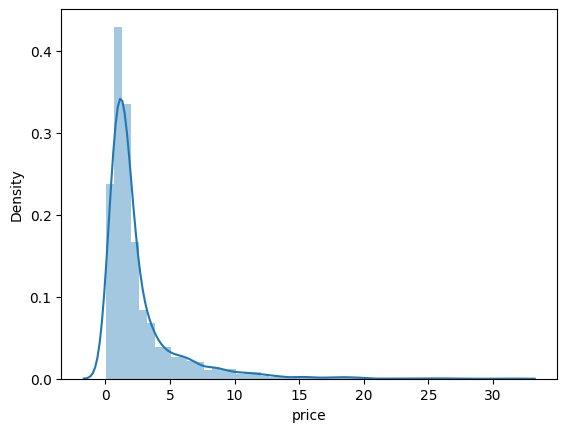

In [16]:
#outliers on the basis of price column
sns.distplot(df['price'])

<Axes: ylabel='price'>

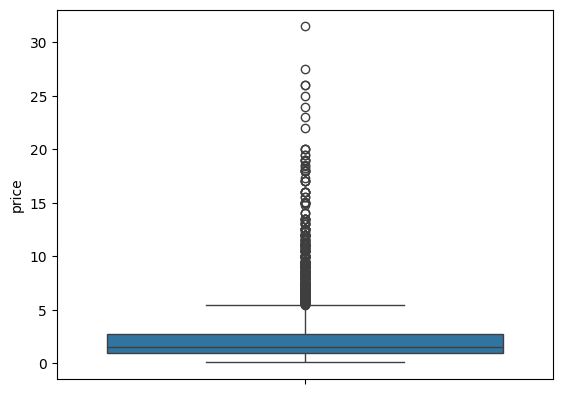

In [17]:
sns.boxplot(df['price'])

In [23]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#identify outliers
outliers = df[(df['price'] > upper_bound) | (df['price'] < lower_bound)]

#Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers,outliers_price_stats

(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

In [25]:
outliers.sort_values('price',ascending=False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3003,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,9000.0,NaN,1,1,1,1,0,1,74
851,house,Independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,2,42
874,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,2,138
1771,house,Independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,1,72
2067,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,0,0
1392,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,2,122
2721,house,Independent,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,South-West,Relatively New,NaN,9000.0,NaN,1,1,1,1,0,2,145
1159,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,3.0,NaN,Moderately Old,NaN,1000.0,NaN,0,1,0,0,0,0,54
2513,house,dlf city plots,sector 26,20.00,44265.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,4.0,North-East,New Property,NaN,4518.0,NaN,1,1,1,1,0,2,153
1169,house,Independent,sector 26,20.00,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,0,1,0,1,97


In [ ]:
# on the basis of price col we can say that there are some genuine outliers but there are some data erros as well

<ipython-input-27-8d74c15a79fa>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

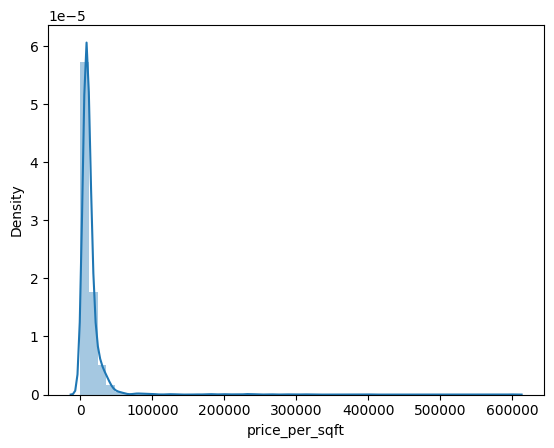

In [27]:
# Price_per_sqft
sns.distplot(df['price_per_sqft'])

<Axes: ylabel='price_per_sqft'>

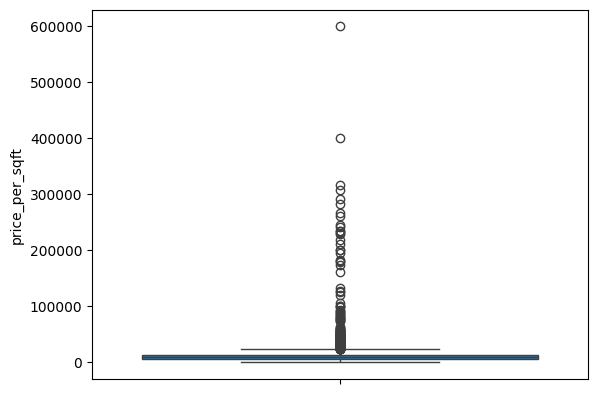

In [28]:
sns.boxplot(df['price_per_sqft'])

In [29]:
# Calculate the IQR for the 'price' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(354,
 count       354.000000
 mean      52592.612994
 std       61150.458507
 min       24489.000000
 25%       28208.250000
 50%       33368.500000
 75%       41982.250000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [30]:
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)

<ipython-input-30-8c5ad871d258>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)


In [31]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

<ipython-input-31-f07934424e06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])


In [32]:
outliers_sqft['price_per_sqft'].describe()

,price_per_sqft
count,354.000000
mean,29357.906780
std,12403.077309
min,2723.000000
25%,25562.000000
50%,29870.500000
75%,35549.500000
max,82540.000000


In [33]:
df.update(outliers_sqft)

In [34]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,la vida by tata housing,sector 113,3.00,14285.0,2100.0,Super Built up area 2691(250 sq.m.)Built Up ar...,3,3,3+,3.0,East,Relatively New,2691.0,2460.0,2100.0,0,1,0,0,0,0,167
1,flat,umang monsoon breeze,sector 78,0.88,4746.0,1854.0,Super Built up area 1854(172.24 sq.m.)Built Up...,3,4,3,8.0,North-West,Moderately Old,1854.0,1668.0,1501.0,0,1,0,1,0,0,111
2,flat,ireo the grand arch,sector 58,4.85,16934.0,2864.0,Carpet area: 2864 (266.07 sq.m.),4,5,3,23.0,North-West,Relatively New,NaN,NaN,2864.0,1,1,0,1,1,2,49
3,flat,m3m woodshire,sector 107,1.49,6310.0,2361.0,Super Built up area 2361(219.34 sq.m.),3,4,3+,5.0,East,Relatively New,2361.0,NaN,NaN,0,1,1,0,0,2,174
4,flat,ambience creacions,sector 22,6.16,20533.0,3000.0,Carpet area: 3000 (278.71 sq.m.),4,5,3+,10.0,South-East,New Property,NaN,NaN,3000.0,0,1,0,1,0,2,49


<ipython-input-35-03a688873ccd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

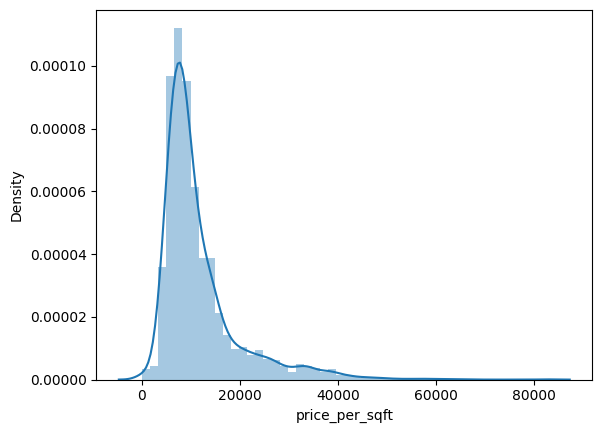

In [35]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

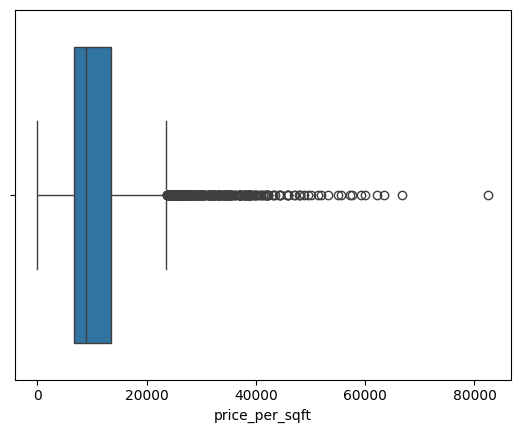

In [36]:
sns.boxplot(x=df['price_per_sqft'])

In [37]:
df[df['price_per_sqft']>50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
192,house,nul,sector 28,12.50,51440.0,2430.0,Plot area 270(225.75 sq.m.),16,17,3+,4.0,South,Relatively New,NaN,2430.0,NaN,1,1,0,1,1,1,137
279,house,Independent,sector 26,14.75,51864.0,2844.0,Plot area 316(264.22 sq.m.),16,20,3+,4.0,East,New Property,NaN,2844.0,NaN,1,1,1,1,0,2,153
874,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,2,138
1392,house,emaar the palm springs,sector 54,24.00,66667.0,3600.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,2,122
1608,house,project housing board colony,sector 31,8.00,63492.0,1260.0,Built Up area: 140 (117.06 sq.m.),2,1,0,1.0,NaN,Undefined,NaN,140.0,NaN,0,0,0,0,0,0,0
1771,house,Independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,1,72
2004,house,emaar mgf marbella,sector 66,18.00,55556.0,3240.0,Plot area 360(301.01 sq.m.),4,4,3+,3.0,East,Moderately Old,NaN,3240.0,NaN,1,1,0,1,0,1,75
2450,house,Independent,sector 25,16.00,59259.0,2700.0,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,16,16,3+,4.0,West,New Property,NaN,325.0,300.0,1,1,1,1,0,1,72
3019,house,emaar the palm springs,sector 54,14.00,62222.0,2250.0,Plot area 250(209.03 sq.m.),4,5,3+,2.0,North,Old Property,NaN,2250.0,NaN,1,1,0,0,0,2,160
3115,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12,12,3+,4.0,North,New Property,NaN,1600.0,NaN,0,0,0,0,0,2,99


In [38]:
df[df['price_per_sqft']>50000].shape

(13, 23)

In [39]:
df = df[df['price_per_sqft'] <= 50000]

<Axes: xlabel='price_per_sqft'>

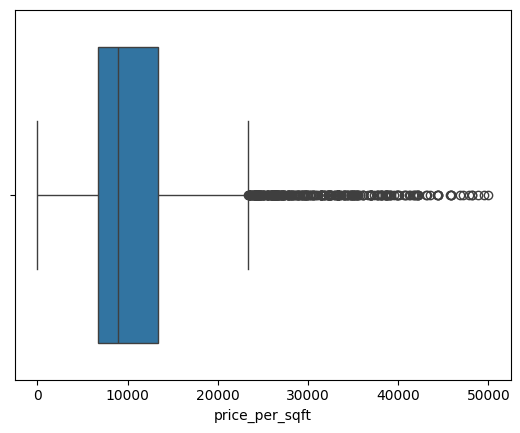

In [40]:
sns.boxplot(x=df['price_per_sqft'])

<ipython-input-41-b43b7f975e41>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

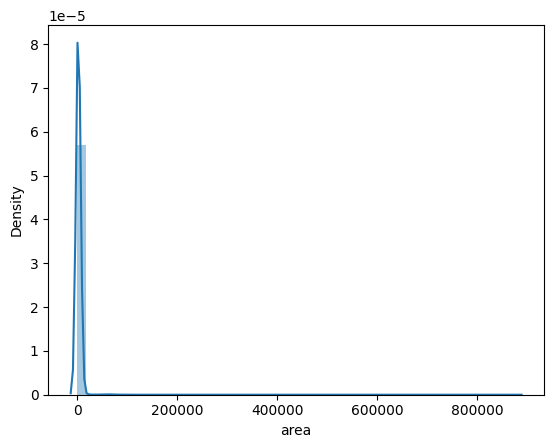

In [41]:
#Area
sns.distplot(df['area'])

<Axes: xlabel='area'>

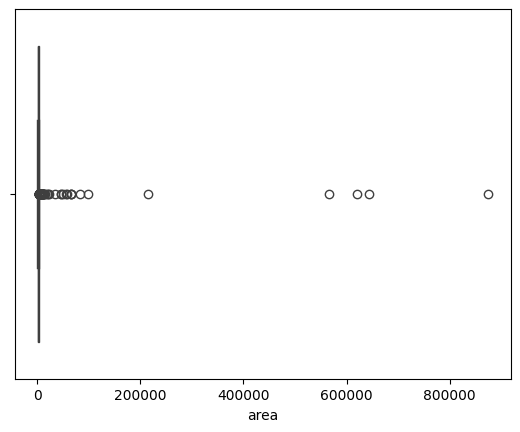

In [42]:
sns.boxplot(x=df['area'])

In [43]:
df['area'].describe()

,area
count,3647.000000
mean,2947.723608
std,23208.194102
min,145.000000
25%,1262.000000
50%,1750.000000
75%,2350.000000
max,875000.000000


In [44]:
df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
697,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2,2,1,3.0,North,New Property,NaN,NaN,514396.0,0,0,0,0,0,0,44
941,house,Independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6,5,3+,2.0,NaN,New Property,NaN,2.0,NaN,1,1,0,1,1,2,0
2669,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2,2,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,1,0,0,0,1,0,65
3375,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2,2,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0,0,0,0,0,1,44
3761,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2,2,2,2.0,South-West,New Property,NaN,NaN,569243.0,0,0,0,0,0,0,76


In [45]:
df = df[df['area'] < 100000]

<ipython-input-46-e045d1b00126>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

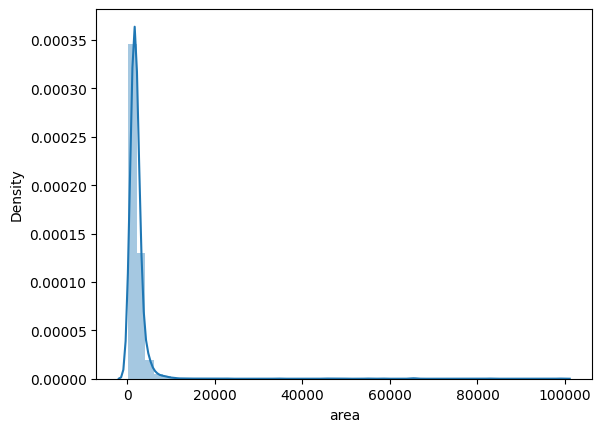

In [46]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

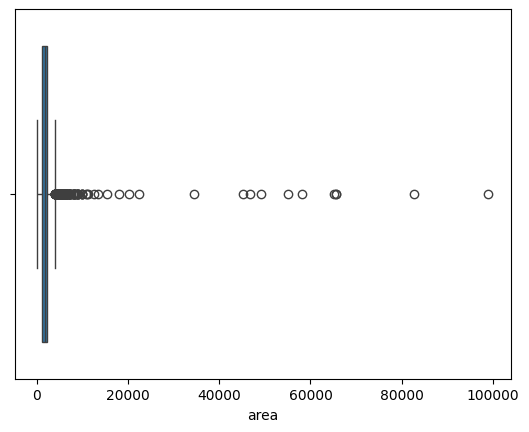

In [47]:
sns.boxplot(x=df['area'])

In [48]:
df[df['area'] > 10000].sort_values('area',ascending=False)

#2301, 190, 1666, 1604, 1390, 379, 1966, 16, 2632

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2301,house,Independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0,1,1,1,0,2,60
590,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,0,7
190,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.00,1,0,0,0,0,0,15
1666,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,64412.00,0,0,0,0,0,0,51
2629,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,0,0
1604,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0,0,0,0,0,0,15
1390,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0,0,0,0,0,0,37
379,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1,0,0,0,0,0,37
135,house,Independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,2,109
1966,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0,0,0,0,1,0,33


In [49]:
df[df['area'] > 10000].sort_values('area',ascending=False).shape

(20, 23)

In [50]:
df.drop(index=[2301, 190, 1666, 1604, 1390, 379, 1966, 16, 2632], inplace=True)

In [52]:
df.drop(index=[590], inplace=True)

In [53]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2629,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,0,0
135,house,Independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,2,109
3686,house,Independent,sector 57,6.25,2778.0,22498.0,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9,9,3+,3.0,North-East,New Property,NaN,2660.0,2500.00,0,1,0,0,0,2,61
907,house,Independent,sector 43,5.50,2716.0,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850...,8,7,3+,3.0,East,Moderately Old,NaN,2850.0,2250.00,1,1,0,1,1,2,123
496,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Under Construction,NaN,NaN,18122.00,1,0,0,1,1,2,44
1581,house,unitech aspen greens,sector 50,6.95,4490.0,15479.0,Plot area 240(200.67 sq.m.)Built Up area: 2160...,3,3,1,2.0,North-East,Moderately Old,NaN,2160.0,1720.00,0,1,0,0,0,0,160
2970,flat,godrej icon,sector 88a,1.75,1384.0,12645.0,Carpet area: 1175.11,3,3,3+,6.0,NaN,New Property,NaN,NaN,1175.11,0,0,0,0,0,0,55
851,house,Independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,2,42
1794,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.00,0,1,0,0,0,0,60
3119,house,Independent,sohna road road,5.50,5093.0,10799.0,Plot area 1200(1003.35 sq.m.)Built Up area: 35...,3,3,3+,2.0,West,Moderately Old,NaN,3500.0,NaN,1,1,0,1,1,0,49


In [54]:
df.loc[2629,'area'] = 7250
df.loc[135,'area'] = 5800
df.loc[3686,'area'] = 2660
df.loc[907,'area'] = 2850
df.loc[496,'area'] = 1812
df.loc[1581,'area'] = 2160
df.loc[2970,'area'] = 1175

<ipython-input-55-e045d1b00126>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

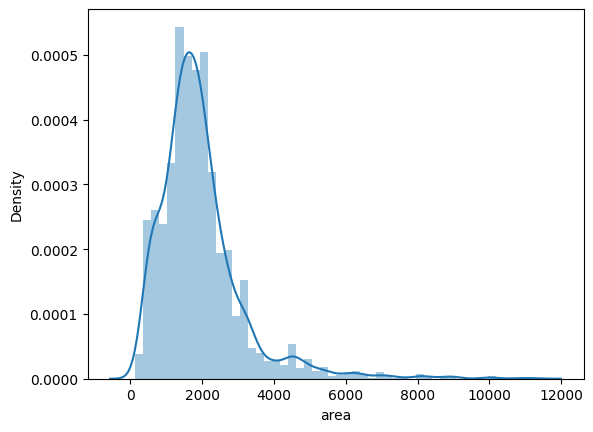

In [55]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

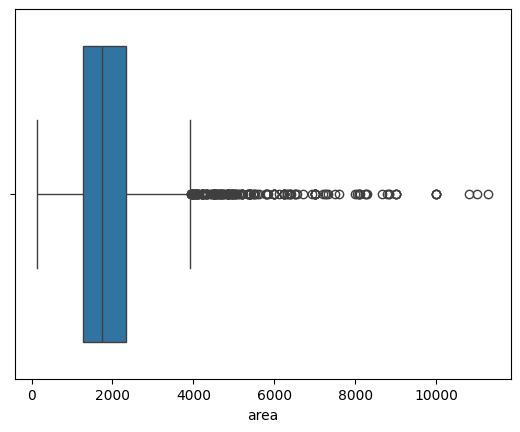

In [56]:
sns.boxplot(x=df['area'])

In [57]:
df['area'].describe()

,area
count,3632.000000
mean,1950.609031
std,1215.780369
min,145.000000
25%,1260.750000
50%,1748.000000
75%,2326.000000
max,11286.000000


<ipython-input-58-51d7279592e8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

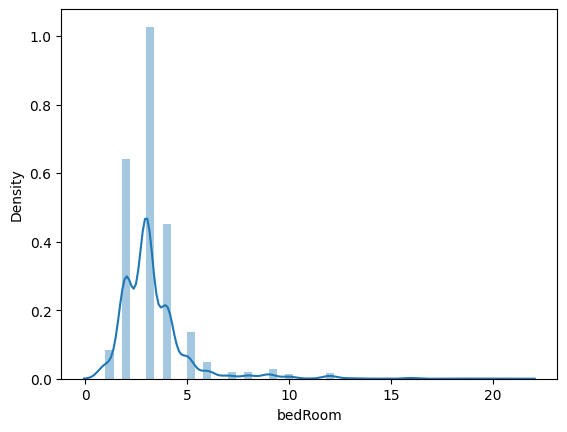

In [58]:
#Bedroom
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

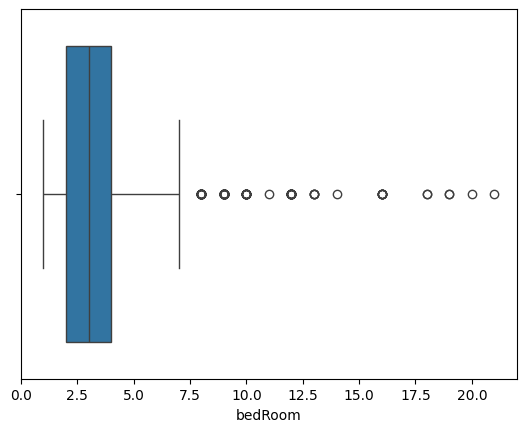

In [59]:
sns.boxplot(x=df['bedRoom'])

In [60]:
df['bedRoom'].describe()

,bedRoom
count,3632.000000
mean,3.331773
std,1.826939
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,21.000000


In [61]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
121,house,Independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,3+,5.0,North,Relatively New,NaN,1161.0,NaN,0,1,0,0,0,1,49
1137,house,Independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20,20,3+,4.0,East,Relatively New,NaN,1152.0,NaN,0,1,0,0,0,1,22
2016,house,Independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19,17,3,4.0,North-West,Relatively New,NaN,1622.0,NaN,1,1,1,1,0,0,74
2437,house,Independent,sector 17a,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19,17,3+,5.0,North-West,Relatively New,NaN,7500.0,NaN,1,0,1,0,0,0,68
56,house,Independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18,18,3+,4.0,South-West,Relatively New,NaN,1440.0,NaN,0,1,0,0,0,1,70
1710,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18,18,3+,4.0,North-East,Relatively New,NaN,1503.0,NaN,0,0,0,0,1,1,57
3687,house,Independent,sector 11,4.50,25000.0,1800.0,Plot area 200(167.23 sq.m.),16,16,3+,4.0,South,Relatively New,NaN,1800.0,NaN,0,0,0,0,0,2,20
2604,house,Independent,sector 56,12.39,45889.0,2700.0,Plot area 300(250.84 sq.m.),16,18,3+,4.0,North-East,New Property,NaN,2700.0,NaN,0,1,0,1,0,2,49
2513,house,dlf city plots,sector 26,20.00,44267.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,4.0,North-East,New Property,NaN,4518.0,NaN,1,1,1,1,0,2,153
1362,house,Independent,sector 43,13.50,50000.0,2700.0,Plot area 300(250.84 sq.m.),16,16,3+,4.0,North-West,Relatively New,NaN,2700.0,NaN,1,1,0,1,1,0,41


In [62]:
df = df[df['bedRoom'] <= 10]

In [63]:
df.shape

(3587, 23)

<ipython-input-64-926418d7e639>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

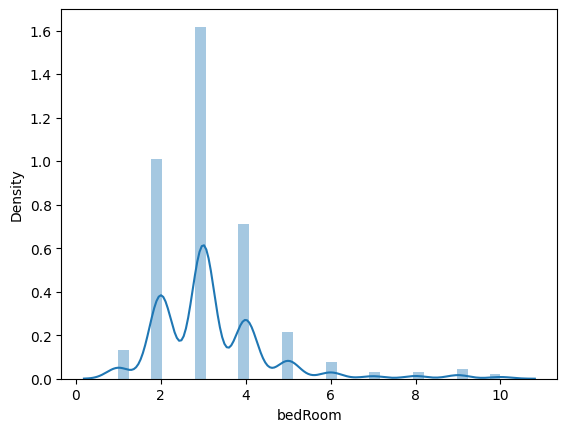

In [64]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

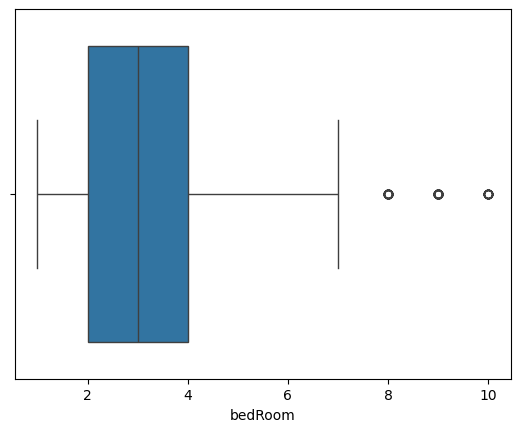

In [65]:
sns.boxplot(x=df['bedRoom'])

In [66]:
df['bedRoom'].describe()

,bedRoom
count,3587.000000
mean,3.201840
std,1.389534
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,10.000000


<ipython-input-67-e649f852b9af>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])


<Axes: xlabel='bathroom', ylabel='Density'>

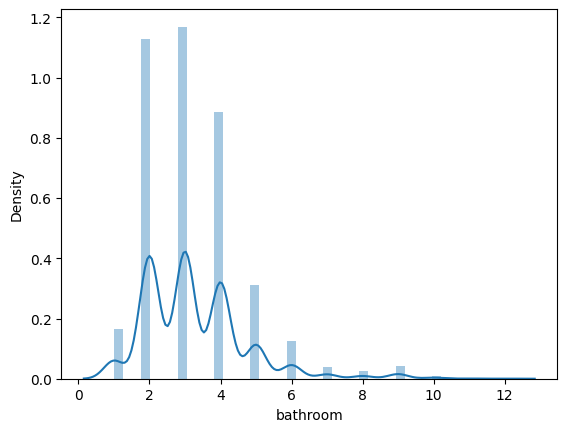

In [67]:
#Bathroom
sns.distplot(df['bathroom'])

<Axes: xlabel='bathroom'>

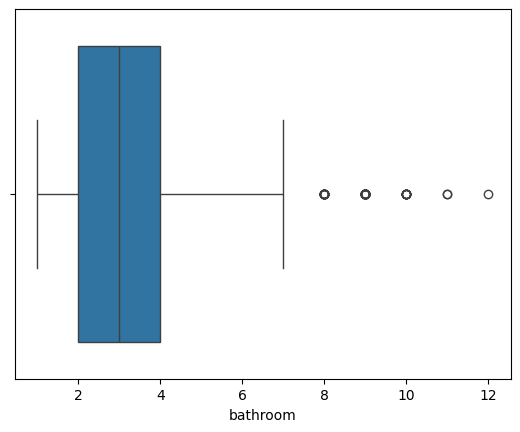

In [68]:
sns.boxplot(x=df['bathroom'])

In [69]:
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3037,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9,12,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,0,1,0,0,0,2,146
2834,house,Independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8,11,3+,3.0,East,Old Property,NaN,5000.0,NaN,1,1,0,1,1,2,39
3525,house,Independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10,11,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,0,0,0,1,0,1,38


In [70]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,la vida by tata housing,sector 113,3.00,14285.0,2100.0,Super Built up area 2691(250 sq.m.)Built Up ar...,3,3,3+,3.0,East,Relatively New,2691.0,2460.0,2100.0,0,1,0,0,0,0,167
1,flat,umang monsoon breeze,sector 78,0.88,4746.0,1854.0,Super Built up area 1854(172.24 sq.m.)Built Up...,3,4,3,8.0,North-West,Moderately Old,1854.0,1668.0,1501.0,0,1,0,1,0,0,111
2,flat,ireo the grand arch,sector 58,4.85,16934.0,2864.0,Carpet area: 2864 (266.07 sq.m.),4,5,3,23.0,North-West,Relatively New,NaN,NaN,2864.0,1,1,0,1,1,2,49
3,flat,m3m woodshire,sector 107,1.49,6310.0,2361.0,Super Built up area 2361(219.34 sq.m.),3,4,3+,5.0,East,Relatively New,2361.0,NaN,NaN,0,1,1,0,0,2,174
4,flat,ambience creacions,sector 22,6.16,20533.0,3000.0,Carpet area: 3000 (278.71 sq.m.),4,5,3+,10.0,South-East,New Property,NaN,NaN,3000.0,0,1,0,1,0,2,49


## super built up area

<ipython-input-71-ce4cb092a62b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])


<Axes: xlabel='super_built_up_area', ylabel='Density'>

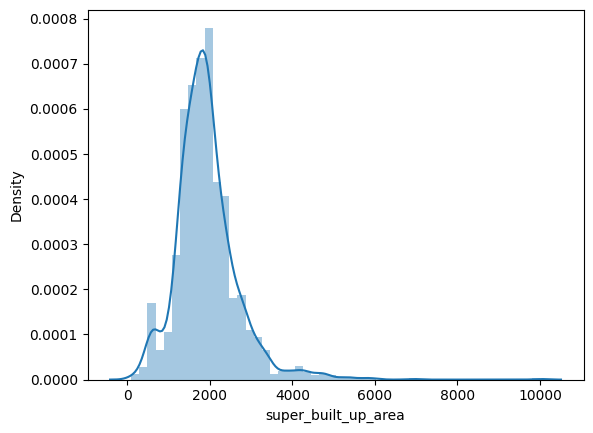

In [71]:
sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

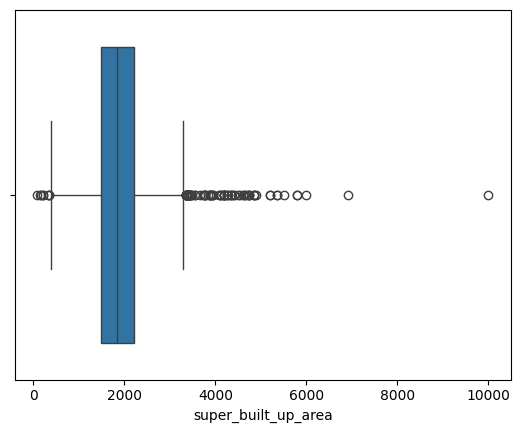

In [72]:
sns.boxplot(x=df['super_built_up_area'])

In [73]:
df['super_built_up_area'].describe()

,super_built_up_area
count,1875.000000
mean,1925.237627
std,764.172177
min,89.000000
25%,1479.500000
50%,1828.000000
75%,2215.000000
max,10000.000000


In [74]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
708,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4,4,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0,1,0,0,0,2,140
3710,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5,6,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,0,1,0,1,1,0,49


## built up area

<ipython-input-75-7e13bd12b627>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])


<Axes: xlabel='built_up_area', ylabel='Density'>

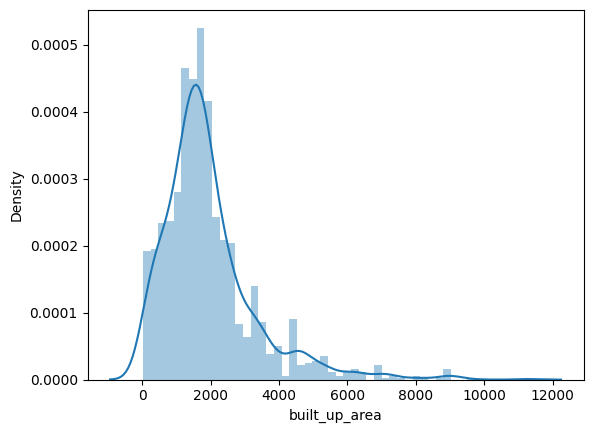

In [75]:
sns.distplot(df['built_up_area'])

<Axes: xlabel='built_up_area'>

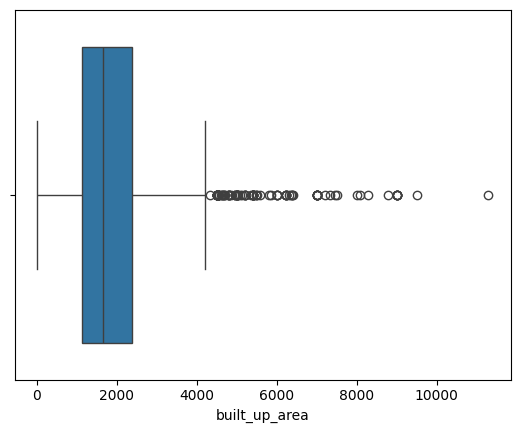

In [76]:
sns.boxplot(x=df['built_up_area'])

In [77]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
851,house,Independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,2,42


## carpet area

<ipython-input-78-becec57fa840>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])


<Axes: xlabel='carpet_area', ylabel='Density'>

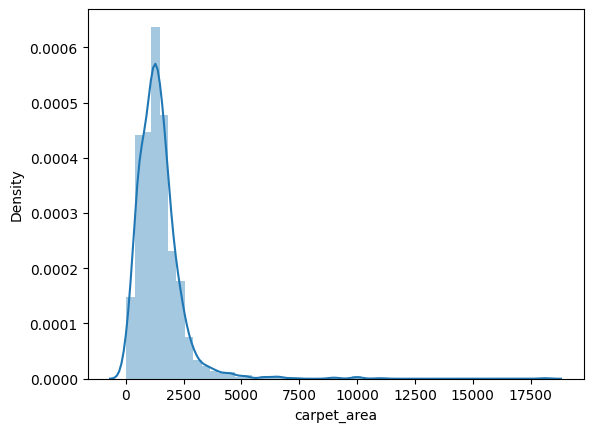

In [78]:
sns.distplot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

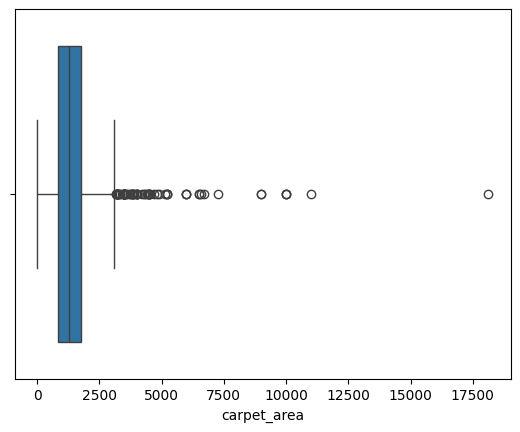

In [79]:
sns.boxplot(x=df['carpet_area'])

In [80]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
496,flat,godrej air,sector 85,2.5,1379.0,1812.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Under Construction,NaN,NaN,18122.0,1,0,0,1,1,2,44
1794,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,0,60


In [81]:
df.loc[496,'carpet_area'] = 1812

In [82]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1794,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,0,60


In [83]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,la vida by tata housing,sector 113,3.00,14285.0,2100.0,Super Built up area 2691(250 sq.m.)Built Up ar...,3,3,3+,3.0,East,Relatively New,2691.0,2460.0,2100.0,0,1,0,0,0,0,167
1,flat,umang monsoon breeze,sector 78,0.88,4746.0,1854.0,Super Built up area 1854(172.24 sq.m.)Built Up...,3,4,3,8.0,North-West,Moderately Old,1854.0,1668.0,1501.0,0,1,0,1,0,0,111
2,flat,ireo the grand arch,sector 58,4.85,16934.0,2864.0,Carpet area: 2864 (266.07 sq.m.),4,5,3,23.0,North-West,Relatively New,NaN,NaN,2864.0,1,1,0,1,1,2,49
3,flat,m3m woodshire,sector 107,1.49,6310.0,2361.0,Super Built up area 2361(219.34 sq.m.),3,4,3+,5.0,East,Relatively New,2361.0,NaN,NaN,0,1,1,0,0,2,174
4,flat,ambience creacions,sector 22,6.16,20533.0,3000.0,Carpet area: 3000 (278.71 sq.m.),4,5,3+,10.0,South-East,New Property,NaN,NaN,3000.0,0,1,0,1,0,2,49


## luxury score

<ipython-input-84-bd70b6910aad>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_score'])


<Axes: xlabel='luxury_score', ylabel='Density'>

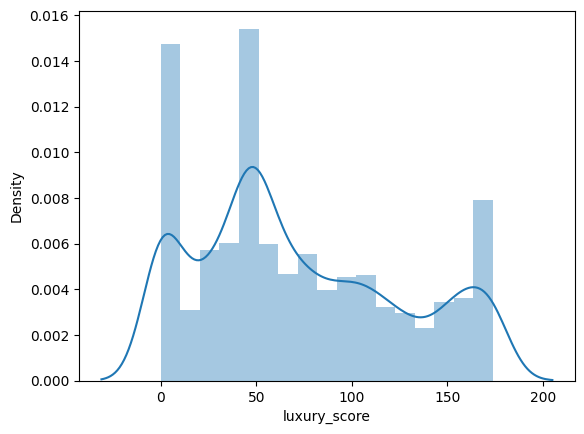

In [84]:
sns.distplot(df['luxury_score'])

<Axes: ylabel='luxury_score'>

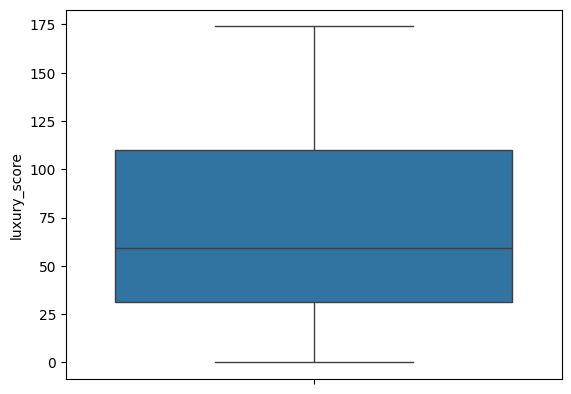

In [85]:
sns.boxplot(df['luxury_score'])

In [86]:
df.shape

(3587, 23)

In [87]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

<ipython-input-88-03a688873ccd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

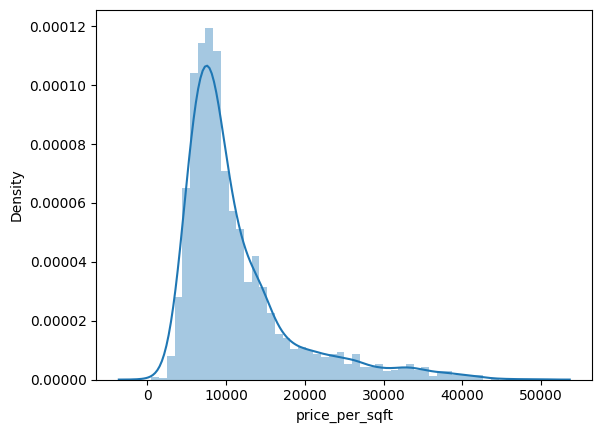

In [88]:
sns.distplot(df['price_per_sqft'])

<Axes: ylabel='price_per_sqft'>

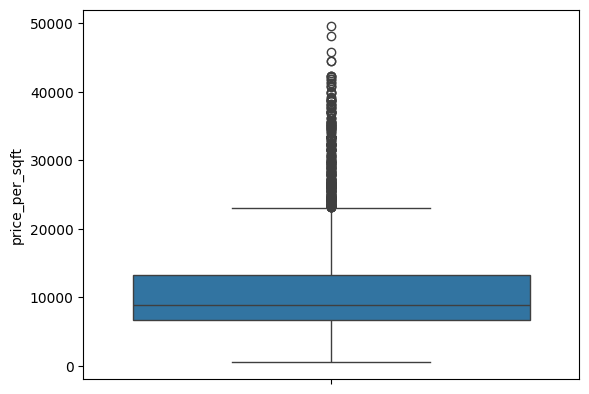

In [89]:
sns.boxplot(df['price_per_sqft'])

In [90]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
277,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6,6,3,2.0,East,Relatively New,NaN,4518.0,NaN,1,1,0,0,0,2,121
1169,house,Independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,0,1,0,1,97
1407,house,Independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2,2,2,3.0,North,Undefined,NaN,2000.0,1800.0,0,0,0,0,0,0,0
1851,house,Independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5,5,3+,2.0,North-East,Relatively New,NaN,300.0,250.0,0,1,0,1,0,2,88
2638,house,Independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6,8,3+,3.0,East,Moderately Old,NaN,4500.0,NaN,1,1,1,1,0,2,103
2824,house,Independent,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6,8,3+,NaN,NaN,Relatively New,NaN,2844.0,NaN,1,1,1,1,0,1,0
3149,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3,3,3+,4.0,North,New Property,NaN,2700.0,NaN,0,0,0,1,0,2,7
3534,house,Independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4,5,3+,4.0,East,Relatively New,NaN,2844.0,NaN,0,1,1,1,0,2,60
3754,house,Independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9,9,3+,5.0,East,New Property,NaN,115.0,100.0,0,0,0,0,1,2,44


In [97]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.05)

np.float64(252.3)

In [100]:
df[(df['area']/df['bedRoom'])<252].sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1672,house,Independent,sector 3,0.80,8155.0,981.0,Plot area 109(91.14 sq.m.),5,4,1,2.0,NaN,Moderately Old,NaN,981.0,NaN,0,0,0,0,0,0,0
1785,house,Independent,sector 2,0.98,9074.0,1080.0,Carpet area: 120 (100.34 sq.m.),9,4,3,1.0,South,Undefined,NaN,NaN,120.0,0,0,0,0,0,0,0
1925,flat,prime habitat,sector 99a,0.27,5433.0,497.0,Carpet area: 497 (46.17 sq.m.),2,2,1,4.0,North-East,New Property,NaN,NaN,497.0,0,0,0,0,0,0,7
663,flat,prime habitat,sector 99a,0.27,6054.0,446.0,Carpet area: 448 (41.62 sq.m.),2,2,1,10.0,South,Relatively New,NaN,NaN,448.0,0,0,0,0,0,0,67
2030,house,naman residency,sector 4,0.50,11111.0,450.0,Plot area 450(41.81 sq.m.),2,2,2,2.0,West,New Property,NaN,450.0,NaN,1,1,0,1,1,0,14


In [102]:
df[(df['area']/df['bedRoom'])<252].shape

(196, 23)

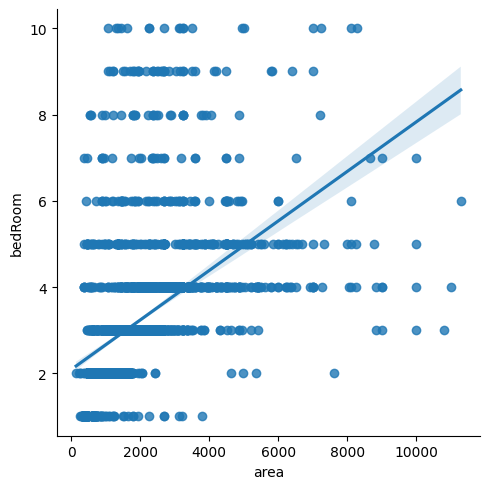

In [101]:
sns.lmplot(data=df,x='area',y='bedRoom')

In [103]:
df['area_room_ratio'] = df['area']/df['bedRoom']

In [105]:
(df[df['area_room_ratio'] < 250])['bedRoom'].value_counts()

,count
bedRoom,
2,47
3,33
5,28
6,17
4,17
9,15
8,12
7,8
10,7


In [106]:
df=df[df['area_room_ratio'] > 100]

In [107]:
outliers_df = df[(df['area_room_ratio'] < 250) & (df['bedRoom'] > 3)]

In [108]:
outliers_df['bedRoom'] = round(outliers_df['bedRoom']/outliers_df['floorNum'])

<ipython-input-108-cc709567dc6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['bedRoom'] = round(outliers_df['bedRoom']/outliers_df['floorNum'])


In [109]:
df.update(outliers_df)

In [110]:
df['area_room_ratio'] = df['area']/df['bedRoom']

In [111]:
df[(df['area_room_ratio'] < 250) & (df['bedRoom'] > 4)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
55,house,Independent,manesar,1.10,6173.0,1782.0,Plot area 1782(165.55 sq.m.),8,8,0,1.0,NaN,New Property,NaN,1782.0,NaN,0,0,0,0,0,0,0,222.750000
265,house,"bhim nagar, sector 6",sector 6,0.85,14096.0,603.0,Plot area 67(6.22 sq.m.),5,2,2,1.0,NaN,Old Property,NaN,67.0,NaN,0,0,0,1,0,0,29,120.600000
495,house,Independent,sector 3 phase 2,1.10,10000.0,1100.0,Built Up area: 1100 (102.19 sq.m.)Carpet area:...,5,4,2,1.0,East,Undefined,NaN,1100.0,900.0,0,0,0,0,0,0,0,220.000000
1022,house,Independent,sector 3 phase 2,0.85,9444.0,900.0,Carpet area: 900 (83.61 sq.m.),5,3,3,1.0,NaN,Undefined,NaN,NaN,900.0,0,0,0,0,0,0,0,180.000000
1252,house,Independent,sector 11,3.50,15556.0,2250.0,Built Up area: 2250 (209.03 sq.m.),10,1,0,1.0,NaN,New Property,NaN,2250.0,NaN,0,0,0,0,0,0,0,225.000000
1785,house,Independent,sector 2,0.98,9074.0,1080.0,Carpet area: 120 (100.34 sq.m.),9,4,3,1.0,South,Undefined,NaN,NaN,120.0,0,0,0,0,0,0,0,120.000000
1819,house,Independent,sector 12,0.65,6500.0,1000.0,Carpet area: 1000 (92.9 sq.m.),6,2,3,1.0,NaN,Undefined,NaN,NaN,1000.0,0,0,0,0,0,0,0,166.666667
1839,house,Independent,sector 17,0.32,5664.0,565.0,Built Up area: 565 (52.49 sq.m.),5,1,0,1.0,NaN,Undefined,NaN,565.0,NaN,0,0,0,0,0,0,0,113.000000
1905,house,Independent,sector 105,1.10,12222.0,900.0,Carpet area: 900 (83.61 sq.m.),6,4,1,1.0,South-West,Undefined,NaN,NaN,900.0,0,0,0,0,0,0,0,150.000000
2112,house,shivpuri,sector 7,2.80,12444.0,2250.0,Plot area 2250(209.03 sq.m.),10,7,3,1.0,NaN,Old Property,NaN,2250.0,NaN,1,1,0,1,1,2,0,225.000000


In [112]:
df[(df['area_room_ratio'] < 250) & (df['bedRoom'] > 4)].shape

(13, 24)

In [113]:
df.shape

(3567, 24)

In [114]:
df = df[~((df['area_room_ratio'] < 250) & (df['bedRoom'] > 4))]

In [115]:
df.shape

(3554, 24)

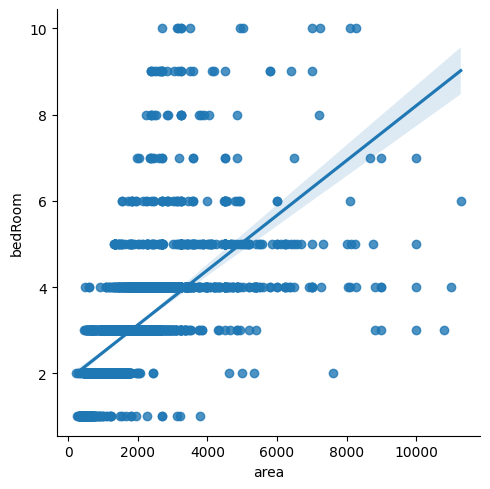

In [116]:
sns.lmplot(data=df,x='area',y='bedRoom')

In [117]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,la vida by tata housing,sector 113,3.00,14286.0,2100.0,Super Built up area 2691(250 sq.m.)Built Up ar...,3,3,3+,3.0,East,Relatively New,2691.0,2460.0,2100.0,0,1,0,0,0,0,167,700.0
1,flat,umang monsoon breeze,sector 78,0.88,4746.0,1854.0,Super Built up area 1854(172.24 sq.m.)Built Up...,3,4,3,8.0,North-West,Moderately Old,1854.0,1668.0,1501.0,0,1,0,1,0,0,111,618.0
2,flat,ireo the grand arch,sector 58,4.85,16934.0,2864.0,Carpet area: 2864 (266.07 sq.m.),4,5,3,23.0,North-West,Relatively New,NaN,NaN,2864.0,1,1,0,1,1,2,49,716.0
3,flat,m3m woodshire,sector 107,1.49,6311.0,2361.0,Super Built up area 2361(219.34 sq.m.),3,4,3+,5.0,East,Relatively New,2361.0,NaN,NaN,0,1,1,0,0,2,174,787.0
4,flat,ambience creacions,sector 22,6.16,20533.0,3000.0,Carpet area: 3000 (278.71 sq.m.),4,5,3+,10.0,South-East,New Property,NaN,NaN,3000.0,0,1,0,1,0,2,49,750.0


In [118]:
df.to_csv('gurgaon_properties_outlier_treated.csv',index=False)